In [5]:
!pip install openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\rjrag\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


Initial Data:
  Student_ID Student_Name          Course_Name       Category Enrolled_Date  \
0       S001         John        Python Basics    Programming    2024-01-12   
1       S002        Meera  Excel for Beginners   Productivity    2024-01-15   
2       S003        Arjun        Python Basics    Programming    2024-01-20   
3       S004        Priya  Power BI Essentials  Data Analysis    2024-02-02   
4       S005        Karan        Python Basics    Programming    2024-02-10   

  Completed  Rating  Time_Spent_Hours  
0       Yes     4.0                12  
1        No     NaN                 2  
2       Yes     5.0                16  
3        No     NaN                 3  
4       Yes     4.0                14  

Missing Values Before Cleaning:
Student_ID          0
Student_Name        0
Course_Name         0
Category            0
Enrolled_Date       0
Completed           0
Rating              2
Time_Spent_Hours    0
dtype: int64

Missing Values After Cleaning:
Student_ID       

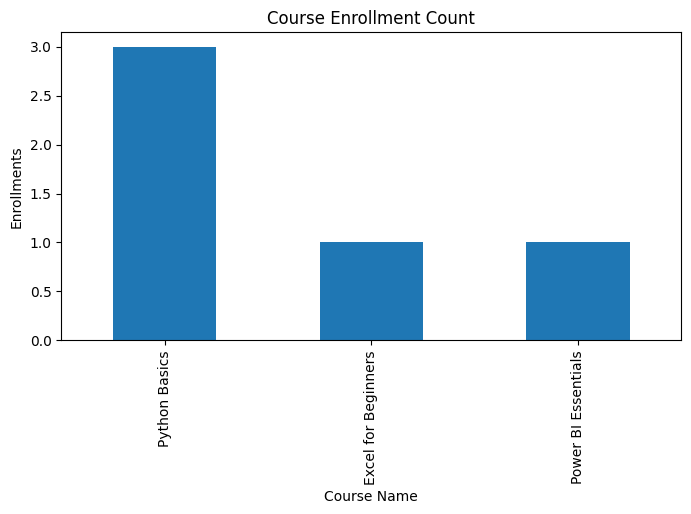

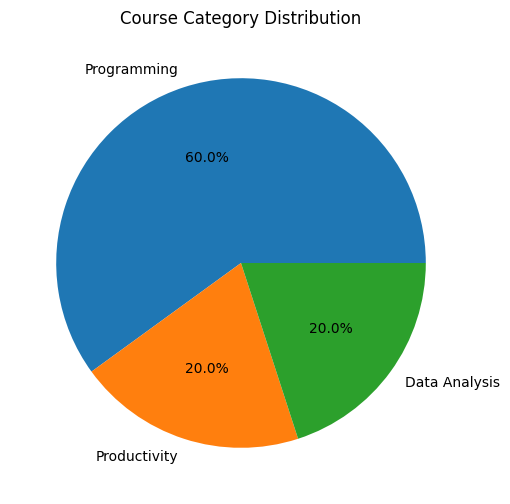

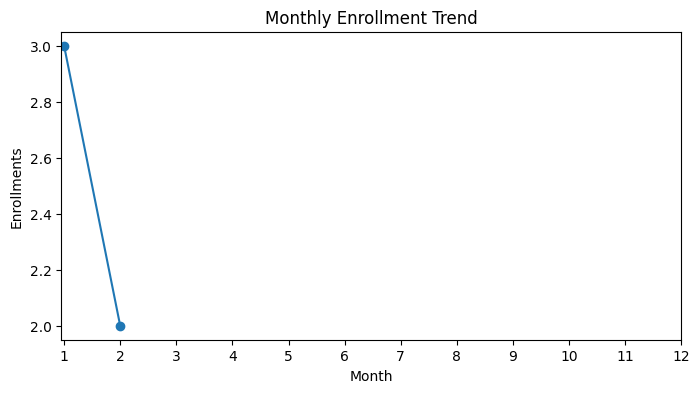

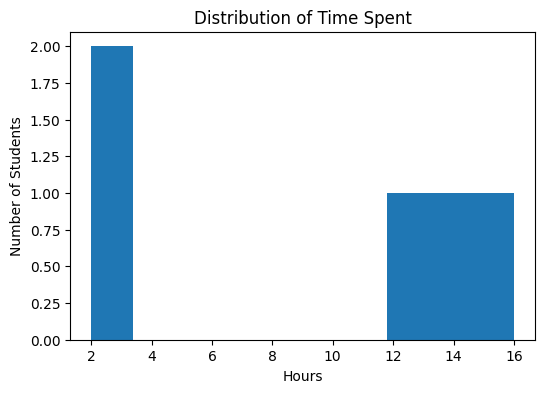

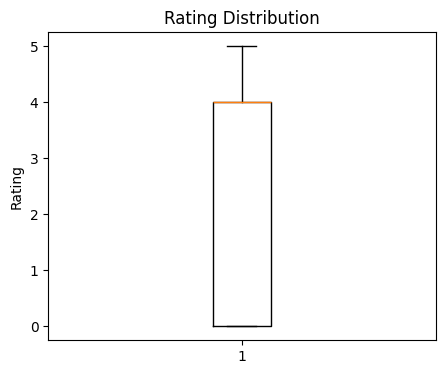


Cleaned dataset exported successfully!


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------
# 1. Load Excel Dataset
# ------------------------------
df = pd.read_excel(r"C:\Users\rjrag\OneDrive\Desktop\ML Class\Python Libraries class\online_course_dataset.xlsx",engine="openpyxl")

print("Initial Data:")
print(df.head())
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# ------------------------------
# 2. Data Cleaning
# ------------------------------

# Convert date column
df['Enrolled_Date'] = pd.to_datetime(df['Enrolled_Date'])

# Replace missing ratings with 0
df['Rating'] = df['Rating'].fillna(0)

# Standardize categories
df['Category'] = df['Category'].str.title()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Ensure numeric columns are correct type
df['Time_Spent_Hours'] = df['Time_Spent_Hours'].astype(float)

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# ------------------------------
# 3. Analysis
# ------------------------------

# A. Course popularity
course_popularity = df['Course_Name'].value_counts()
print("\nCourse Popularity:")
print(course_popularity)

# B. Category-wise count
category_count = df['Category'].value_counts()
print("\nCategory Count:")
print(category_count)

# C. Completion rate
completion_rate = df['Completed'].value_counts(normalize=True) * 100
print("\nCompletion Rate:")
print(completion_rate)

# D. Average hours spent
avg_hours = df['Time_Spent_Hours'].mean()
print("\nAverage Time Spent (Hours):", avg_hours)

# E. Rating analysis
rating_by_course = df.groupby("Course_Name")['Rating'].mean()
print("\nAverage Rating by Course:")
print(rating_by_course)

# F. Monthly enrollments
df['Month'] = df['Enrolled_Date'].dt.month
monthly_enrollments = df['Month'].value_counts().sort_index()
print("\nMonthly Enrollments:")
print(monthly_enrollments)

# ------------------------------
# 4. Visualizations
# ------------------------------

# A. Course Popularity Bar Chart
plt.figure(figsize=(8,4))
course_popularity.plot(kind='bar')
plt.title("Course Enrollment Count")
plt.xlabel("Course Name")
plt.ylabel("Enrollments")
plt.show()

# B. Category Pie Chart
plt.figure(figsize=(6,6))
category_count.plot(kind='pie', autopct='%1.1f%%')
plt.title("Course Category Distribution")
plt.ylabel("")
plt.show()

# C. Monthly Enrollment Line Chart
plt.figure(figsize=(8,4))
monthly_enrollments.plot(kind='line', marker='o')
plt.title("Monthly Enrollment Trend")
plt.xlabel("Month")
plt.ylabel("Enrollments")
plt.xticks(range(1,13))
plt.show()

# D. Time spent histogram
plt.figure(figsize=(6,4))
plt.hist(df['Time_Spent_Hours'])
plt.title("Distribution of Time Spent")
plt.xlabel("Hours")
plt.ylabel("Number of Students")
plt.show()

# E. Rating Boxplot
plt.figure(figsize=(5,4))
plt.boxplot(df['Rating'])
plt.title("Rating Distribution")
plt.ylabel("Rating")
plt.show()

# ------------------------------
# 5. Export Cleaned Data
# ------------------------------
df.to_excel("cleaned_online_course_dataset.xlsx", index=False)
print("\nCleaned dataset exported successfully!")
